# <font color='black'>Deep Learning for Image Processing</font>

---

<img src="images/ipsa_logo.png" width="100" align="right">


> Year: **2020**

> Version: **1.0**

Welcome to Ma512- Deep Learning for Image Processing. In this first practical you will learn how to create a Convolutional Neural Network using Keras.

# Convolutional Neural Network for image classification

In this practical exercice a convolutional neural network  is built using keras. It is then trained to classify image digits from the MNIST database.

##  Set-up ##

First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import tensorflow as tf
from keras.datasets import mnist as db
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import h5py



# Magic used by the notebook to show figures inline
%matplotlib inline
# matplotlib default values
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading packages
%load_ext autoreload
%autoreload 2

Class:  1


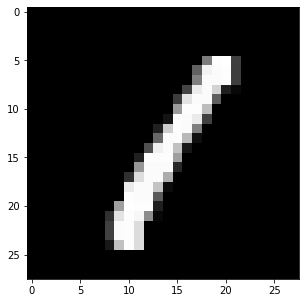

In [2]:
# Load and have a look at the data
(x, y), (x_test, y_test) = db.load_data()

# Visualize a single digit, with its class
index = 3
plt.imshow(x[index])
print("Class: ", y[index])

In [3]:
from keras import backend as K
print(K.image_data_format())

nb_samples = x.shape[0]
val_nb = 5000  # samples in the valudation set
if val_nb > nb_samples:
    raise ValueError("More samples are need i")

img_rows, img_cols = x.shape[1:3]  # input image dimensions

x = x.reshape(nb_samples, img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test.shape, 'y test samples')

# Convert class vectors to binary class vectors - One-hot representations
num_classes = max(y) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)

channels_last
(55000, 28, 28, 1) x train samples
(5000, 28, 28, 1) x val samples
(10000, 28, 28, 1) x test samples
(55000,) y train samples
(5000,) y val samples
(10000,) y test samples


# Model definition

I the following you will use keras to create a convolutional neural network. The definition of the has to respect some constraints:

- The input shape has to match the size of each input sample. 
- The ouptput should be of size the number of classes(num_classes). Here it is 10.

Use `Sequential(), Conv2D(), MaxPooling2D(poolsize = ()), Flatten()` and `Dense()` to define a convolutional neural network. You can start using an architecture as the one defined in class.

In [18]:
filters_layer0 = 32
nb_dense = 128
### START CODE HERE ###
model = Sequential()

model.add(Conv2D(filters=filters_layer0, kernel_size=3, activation="relu",
          input_shape=x_train.shape[1:]))
model.add(MaxPooling2D())

model.add(Conv2D(filters=filters_layer0*2, kernel_size=3, activation="relu",))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(nb_dense, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(tf.keras.layers.Softmax())
### END CODE HERE ###


model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# Model training

Use the method `compile` to define the computational graph and the method `fit` to optimize the model for the  training set defined above and using the corresponding validation set.

In [19]:
from tensorflow.keras.optimizers import SGD

### START CODE HERE ###
batch_size = 512
epochs = 20
learning_rate = 0.1

#model.compile(optimizer=SGD(learning_rate),loss='binary_crossentropy',metrics=['acc'])
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['acc'])

output = model.fit(x_train, y_train,epochs=epochs, batch_size=batch_size,
                   validation_data=(x_val, y_val))

### END CODE HERE ###


Epoch 1/20
108/108 [==============================] - 9s 79ms/step - loss: 0.1492 - acc: 0.6375 - val_loss: 0.1098 - val_acc: 0.6918
Epoch 2/20
108/108 [==============================] - 9s 81ms/step - loss: 0.1091 - acc: 0.6913 - val_loss: 0.1041 - val_acc: 0.7002
Epoch 3/20
108/108 [==============================] - 8s 78ms/step - loss: 0.1050 - acc: 0.6965 - val_loss: 0.1019 - val_acc: 0.7040
Epoch 4/20
108/108 [==============================] - 8s 75ms/step - loss: 0.1026 - acc: 0.6995 - val_loss: 0.1012 - val_acc: 0.7048
Epoch 5/20
108/108 [==============================] - 8s 77ms/step - loss: 0.1014 - acc: 0.7007 - val_loss: 0.1029 - val_acc: 0.7028
Epoch 6/20
108/108 [==============================] - 8s 75ms/step - loss: 0.1001 - acc: 0.7024 - val_loss: 0.1000 - val_acc: 0.7056
Epoch 7/20
108/108 [==============================] - 8s 78ms/step - loss: 0.0996 - acc: 0.7028 - val_loss: 0.0996 - val_acc: 0.7072
Epoch 8/20
108/108 [==============================] - 9s 79ms/step - 

# Learning curves

Plotting the learning curves allows you to
- inspect the traning and validation performance in the training stage,

- analyze the examples which are not working.

Can you tell of the network is overfitting? How can it be reduced?

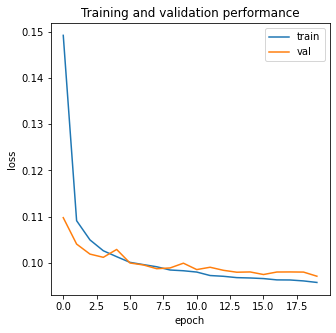

In [20]:
# Plotting the performance of the network
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

# Plotting activations of the neurons

Given a certain input is possible to show the activations of the neurons of the convolutional layers. Run the cells below to understand how to display the activation for the different layers of the CNN.

Class:  [6]


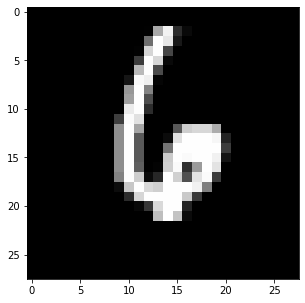

In [37]:
# Choose a random sample from the training data
index = np.random.randint(0, len(x_train))
sample = x_train[index]

plt.imshow(sample[:,:,0])
print("Class: ", np.arange(num_classes)[y_train[index].astype('bool')])

In [38]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(sample.reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap=plt.cm.bwr)
            ax[row][col].axis('off')
            activation_index += 1

Activations values in the first convolutional layer


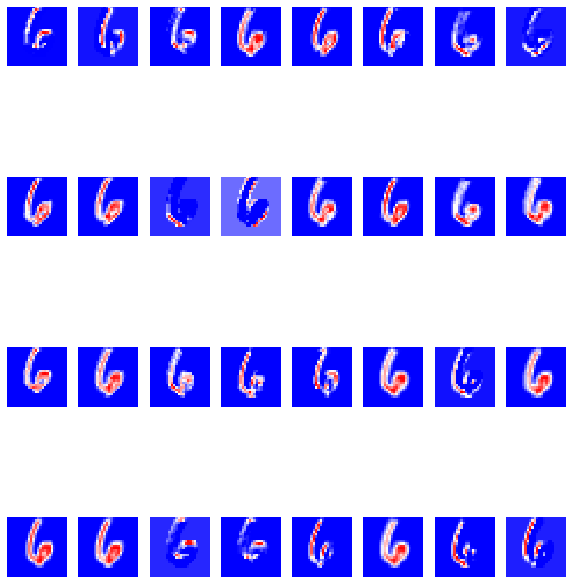

In [39]:
# display activation layer of the first filter
print('Activations values in the first convolutional layer')
display_activation(activations, 8, 4, 0)

Activations values in the second convolutional layer


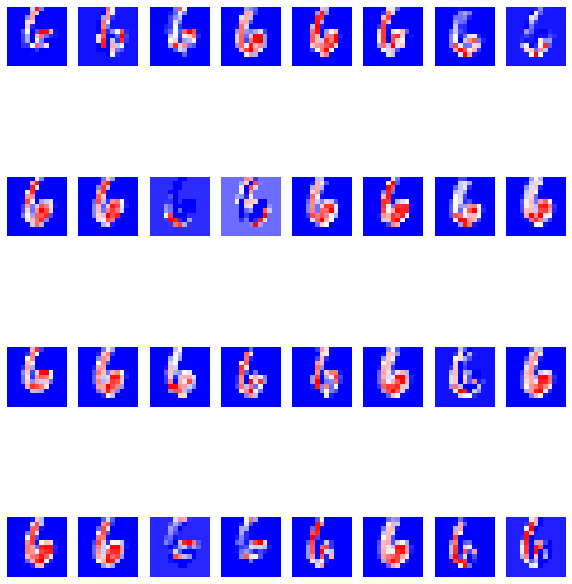

In [40]:
# display activation filter of the second filter
print('Activations values in the second convolutional layer')
display_activation(activations, 8, 4, 1)

# Testing

Test the model on the test set and evaluate its performance.

In [41]:
### START CODE HERE ###


score = model.evaluate(x_test,y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 38.6823 - acc: 0.3805
Test loss: 38.682281494140625
Test accuracy: 0.3804999887943268


Correct label is:  5
Predicted label is:  0
Probabilities:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


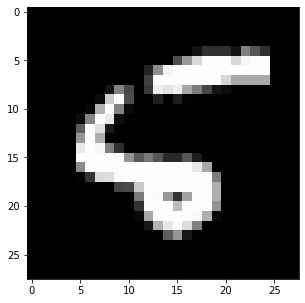

In [42]:
y_predict_proba = model.predict(x_test)

y_predict = np.argmax(y_predict_proba, 1)

diff = y_test != y_predict
x_test_errors = x_test[diff]
y_test_errors = y_test[diff]
y_predict_errors = y_predict[diff]
y_predict_proba_errors = y_predict_proba[diff]

index = 0

print("Correct label is: ", y_test_errors[index])
print("Predicted label is: ", y_predict_errors[index])
print("Probabilities: ", y_predict_proba_errors[index])
plt.imshow(np.squeeze(x_test_errors[index]))

# Experimenting with a more complex database

In the second cell, you can replace:

<code>from keras.datasets import mnist as db</code>

with:

<code>from keras.datasets import fashion_mnist as db</code>

in order to experiment with a more complex database. 
Use the following dictionary to transform number labels into meaningfull labels:

In [36]:
fashion_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

print(fashion_dict[2])

Pullover
